In [304]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; %txt(1:n-8);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cutableaus']; addpath(Cumodelspath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [305]:
% put in constants
VT=0.05; %total volume
stockCuconc=0.0132067;

In [306]:
% put in data
data=[...
%volCu mV
0 100.7
50 130.3
100 143
250 155.1
500 165
1000 174.2
];

addedCuvol=data(:,1)'*1e-6;

originalsamplemVnpH=[...
%pH mV
8.045  54.5
8.059  54
];

In [307]:
% process the data
pH=mean(originalsamplemVnpH(:,1))
mVAoriginal=(originalsamplemVnpH(:,2));

mVA=data(:,2)'; Emeas=mVA; CuTmeas=1e-7; CuT=CuTmeas;
%mest=mVA(3)-mVA(2)
CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol)

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

param=polyfit(log10(CuTplus(1:end)),Emeas(1:end),1)
logCuToriginal=(Emeas(1)-param(2))/param(1)
CuToriginal=(10.^logCuToriginal)*63.546*1e6;
logCuoriginal=mean((mVAoriginal-param(2))/param(1))


pH = 8.0520e+00


CuTplus,1,2,3,4,5,6
1,1e-07,1.32934e-05,2.64605e-05,6.58045e-05,0.000130858,0.000259053


param,1,2
1,21.0845,243.481


logCuToriginal = -6.7718e+00


logCuoriginal = -8.9749e+00


In [308]:
% try one point, assume Nernst slope
m=59.2/2; Eacid=100.7; Eorig=54; %m=param(1); 
Eo=Eacid-(m)*log10(CuT);
logCuonept=(Eorig-Eo)/m

logCuonept = -8.5777e+00


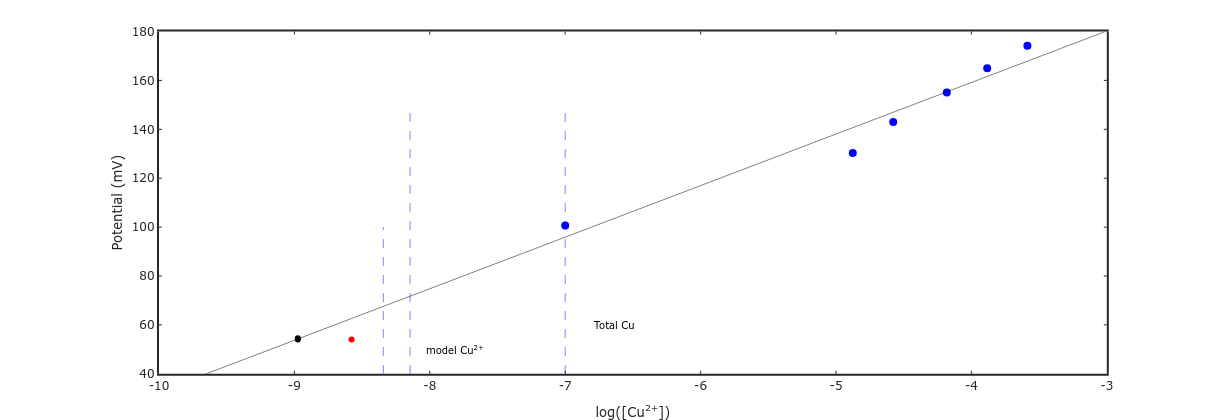

ans,1,2,3,4,5,6
1,-7,-4.87636,-4.5774,-4.18174,-3.8832,-3.58661


logCunosolid = -8.1457e+00


logCuoriginalsample = -8.9749e+00


logCuonept = -8.5777e+00


In [309]:
% MODEL FOR COMPARISON

%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;
pH=pH; pe=20.75-pH; PCO2=10^-3.5;
[Cuall,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauallsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[CuwithCuOs,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauCuOs(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[Cunosolid,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableaunosolid(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);

plot(log10(CuTplus),Emeas,'bo','markersize',8)
log10(CuTplus)

hold on
plot([logCuoriginal'],[mVAoriginal'],'ko')
logCuplot=-13:0.1:-3; Eplot=polyval(param,logCuplot);
plot(logCuplot,Eplot,'k-')
set(gca,'linewidth',2)
xlabel('log[Cu^{2+}]'); ylabel('E (mV)')
hold on

plot([log10(Cuall) log10(Cuall)],[-100 100],'b--')
plot([log10(Cunosolid) log10(Cunosolid)],[-100 150],'b--'); hold on
plot([log10(CuT) log10(CuT)],[-100 150],'b--')
%plot([-9.576 -9.576],[-100 100],'b--')

text(log10(Cunosolid)+0.1,50,'model Cu^{2+}','rotation',90)
text(log10(CuT)+0.2,60,'Total Cu','rotation',90)


xlabel('log([Cu^{2+}])')
ylabel('Potential (mV)')
set(gca,'LineWidth',2,'fontsize',12)

logCunosolid=log10(Cunosolid)
logCuoriginalsample=mean((mVAoriginal-param(2))/param(1))
logCuonept

axis([-10 -3 40 180])

plot(logCuonept,Eorig,'ro','markerfacecolor','r')
